# Предобработка текста

## Часть 1

### Токенизация

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data = "All work and no play makes jack a dull boy, all work and no play"
tokens = word_tokenize(data.lower())
print(tokens)

['all', 'work', 'and', 'no', 'play', 'makes', 'jack', 'a', 'dull', 'boy', ',', 'all', 'work', 'and', 'no', 'play']


In [ ]:
print(sent_tokenize("I was going home when she rung. It was a surprise."))

['I was going home when she rung.', 'It was a surprise.']


[<img src="https://raw.githubusercontent.com/natasha/natasha-logos/master/natasha.svg">](https://github.com/natasha/natasha)

[Razdel](https://natasha.github.io/razdel/)

In [ ]:
# !pip install -q razdel

In [ ]:
from razdel import tokenize, sentenize
text = 'Кружка-термос на 0.5л (50/64 см³, 516;...)'
list(tokenize(text))

[Substring(0, 13, 'Кружка-термос'),
 Substring(14, 16, 'на'),
 Substring(17, 20, '0.5'),
 Substring(20, 21, 'л'),
 Substring(22, 23, '('),
 Substring(23, 28, '50/64'),
 Substring(29, 32, 'см³'),
 Substring(32, 33, ','),
 Substring(34, 37, '516'),
 Substring(37, 38, ';'),
 Substring(38, 41, '...'),
 Substring(41, 42, ')')]

#### Регулярные выражения

Исчерпывающий пост https://habr.com/ru/post/349860/

In [ ]:
import re
word = 'supercalifragilisticexpialidocious'
re.findall('[abc]|up|super', word)

['super', 'c', 'a', 'a', 'c', 'a', 'c']

In [ ]:
re.findall('\d{1,3}', 'These are some numbers: 49 and 432312')

['49', '432', '312']

In [ ]:
re.sub('[,\.?!]','','How, to? split. text!')

'How to split text'

In [ ]:
re.sub('[^A-z]',' ','I 123 can 45 play 67 football').split()

['I', 'can', 'play', 'football']

### Удаление неинформативных слов

#### N-граммы

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--466CQV1q--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_66%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/78nf1vryed8h1tz05fim.gif" height=400>

In [ ]:
unigram = list(nltk.ngrams(tokens, 1))
bigram = list(nltk.ngrams(tokens, 2))
print(unigram[:5])
print(bigram[:5])

[('all',), ('work',), ('and',), ('no',), ('play',)]
[('all', 'work'), ('work', 'and'), ('and', 'no'), ('no', 'play'), ('play', 'makes')]


In [ ]:
from nltk import FreqDist
print('Популярные униграммы: ', FreqDist(unigram).most_common(5))
print('Популярные биграммы: ', FreqDist(bigram).most_common(5))

Популярные униграммы:  [(('all',), 2), (('work',), 2), (('and',), 2), (('no',), 2), (('play',), 2)]
Популярные биграммы:  [(('all', 'work'), 2), (('work', 'and'), 2), (('and', 'no'), 2), (('no', 'play'), 2), (('play', 'makes'), 1)]


#### Стоп-слова

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stopWords = set(stopwords.words('english'))
print(stopWords)

{'were', 'do', 'she', 'had', 'too', 'was', 'myself', 'itself', 'from', 'which', 'you', 'wasn', 'if', 'of', 'only', 'm', 'my', 'weren', 'under', 'this', 'aren', 'each', 'should', 'for', 'because', 'nor', 'with', 'when', 're', 'through', 'until', 'he', 'll', 'just', 'themselves', 'there', 'an', 'doesn', "you've", 'some', "it's", 'his', "you'd", "should've", 'doing', 'having', 'our', 'to', 'mustn', 'ain', 'a', 'hers', 'up', 'those', 'as', 'couldn', "you'll", 'at', 'them', 'about', 'shan', 'why', "couldn't", "shouldn't", 'they', "haven't", 'does', 'be', 't', 'these', 'here', "isn't", 'mightn', 'in', "wasn't", 'where', 'isn', "won't", 'such', 'haven', 'yourselves', 'hasn', 'out', 'needn', 'how', "needn't", 'will', "weren't", 'its', 'whom', 'me', 'again', 'once', "mustn't", 'but', 'now', 'down', 'other', 'over', 'hadn', 'him', "wouldn't", 'before', 'so', 'has', "hadn't", 'been', 'shouldn', 'ma', 'wouldn', 'we', 'is', 'on', 'own', 'did', "didn't", 'off', 'the', 'few', "that'll", 'while', 'i',

In [ ]:
print([word for word in tokens if word not in stopWords])

['work', 'play', 'makes', 'jack', 'dull', 'boy', ',', 'work', 'play']


In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Стемминг vs Лемматизация
* ‘Caring’ -> Лемматизация -> ‘Care’
* ‘Caring’ -> Стемминг -> ‘Car’

### Стемминг
* процесс нахождения основы слова для заданного исходного слова

In [ ]:
from nltk.stem import PorterStemmer, SnowballStemmer
words = ["game", "gaming", "gamed", "games", "compacted"]
words_ru = ['корова', 'мальчики', 'мужчины', 'столом', 'убежала']

In [ ]:
ps = PorterStemmer()
list(map(ps.stem, words))

['game', 'game', 'game', 'game', 'compact']

In [ ]:
ss = SnowballStemmer(language='russian')
list(map(ss.stem, words_ru))

['коров', 'мальчик', 'мужчин', 'стол', 'убежа']

### Лематизация
* процесс приведения словоформы к лемме — её нормальной (словарной) форме

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

raw_ru = """Не существует научных доказательств в пользу эффективности НЛП, оно
признано псевдонаукой. Систематические обзоры указывают, что НЛП основано на
устаревших представлениях об устройстве мозга, несовместимо с современной
неврологией и содержит ряд фактических ошибок."""

In [ ]:
# !pip install -q pymorphy2

In [ ]:
# 1
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
pymorphy_results = list(map(lambda x: morph.parse(x), raw_ru.split(' ')))
print(' '.join([res[0].normal_form for res in pymorphy_results]))

не существовать научный доказательство в польза эффективность нлп, оно
признать псевдонаукой. систематический обзор указывают, что нлп основать на
устаревший представление о устройство мозга, несовместимый с современной
неврология и содержать ряд фактический ошибок.


In [ ]:
# pip install spacy

In [ ]:
# !python -m spacy download en_core_web_sm

In [ ]:
# 2
import spacy
nlp = spacy.load("en_core_web_sm")
spacy_results = nlp(raw)
print(' '.join([token.lemma_ for token in spacy_results]))

DENNIS : listen , strange woman lie in pond distribute sword 
 be no basis for a system of government .   Supreme executive power derive from 
 a mandate from the masse , not from some farcical aquatic ceremony .


[Сравнение PyMorphy2 и PyMystem3](https://habr.com/ru/post/503420/)

### Part-of-Speech

In [ ]:
# 1
[(res[0].normal_form, res[0].tag) for res in pymorphy_results[:9]]

[('не', OpencorporaTag('PRCL')),
 ('существовать', OpencorporaTag('VERB,impf,intr sing,3per,pres,indc')),
 ('научный', OpencorporaTag('ADJF,Qual plur,gent')),
 ('доказательство', OpencorporaTag('NOUN,inan,neut plur,gent')),
 ('в', OpencorporaTag('PREP')),
 ('польза', OpencorporaTag('NOUN,inan,femn sing,accs')),
 ('эффективность', OpencorporaTag('NOUN,inan,femn sing,gent')),
 ('нлп,', OpencorporaTag('UNKN')),
 ('оно\nпризнать', OpencorporaTag('PRTS,perf,past,pssv neut,sing'))]

In [ ]:
# 2
[(token.lemma_, token.pos_) for token in spacy_results[:7]]

[('DENNIS', 'PROPN'),
 (':', 'PUNCT'),
 ('listen', 'VERB'),
 (',', 'PUNCT'),
 ('strange', 'ADJ'),
 ('woman', 'NOUN'),
 ('lie', 'VERB')]

In [ ]:
# pip install rnnmorph

In [ ]:
# pip install tensorflow

In [ ]:
# 3
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="ru")
rnnmorph_result = predictor.predict(raw_ru.split(' '))
[(token.normal_form, token.pos, token.tag) for token in rnnmorph_result[:7]]

ModuleNotFoundError: No module named 'tensorflow'

### Named entities recognition

In [ ]:
doc = nlp('Apple is looking at buying U.K. startup for $1 billion')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


## Часть 2

### Задача классификации

#### 20 newsgroups
Датасет с 18000 новостей, сгруппированных по 20 темам.

In [ ]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [ ]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
newsgroups_train.filenames.shape

(11314,)

#### Выполните классификацию текста на подвыборке из 4 тем новостей 3 методами машинного обучения. <br>В качестве метрики возьмите матрицу ошибок. <br>Сделайте выводы по полученным результатам

In [ ]:
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']

#загрузка тренировочных данных
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)

#тестовые данные
newsgroups_test = fetch_20newsgroups(subset='test',
                                      categories=categories)
newsgroups_train.filenames.shape

(2034,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #метод векторизации текста
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import nltk, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
newsgroups_train.data[0]

"From: rych@festival.ed.ac.uk (R Hawkes)\nSubject: 3DS: Where did all the texture rules go?\nLines: 21\n\nHi,\n\nI've noticed that if you only save a model (with all your mapping planes\npositioned carefully) to a .3DS file that when you reload it after restarting\n3DS, they are given a default position and orientation.  But if you save\nto a .PRJ file their positions/orientation are preserved.  Does anyone\nknow why this information is not stored in the .3DS file?  Nothing is\nexplicitly said in the manual about saving texture rules in the .PRJ file. \nI'd like to be able to read the texture rule information, does anyone have \nthe format for the .PRJ file?\n\nIs the .CEL file format available from somewhere?\n\nRych\n\n======================================================================\nRycharde Hawkes\t\t\t\temail: rych@festival.ed.ac.uk\nVirtual Environment Laboratory\nDept. of Psychology\t\t\tTel  : +44 31 650 3426\nUniv. of Edinburgh\t\t\tFax  : +44 31 667 0150\n==============

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

#обработка текста, удаление стоп слов, знаков пунктуации, лемматизация
def preprocess_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    processed_text = ' '.join(tokens)

    return processed_text
newsgroups_train_preprocess = [preprocess_text(text) for text in newsgroups_train.data]
newsgroups_test_preprocess = [preprocess_text(text) for text in newsgroups_test.data]
newsgroups_train_preprocess[0]

"rych festival.ed.ac.uk r hawkes subject 3d texture rule go line 21 hi 've noticed save model mapping plane positioned carefully .3ds file reload restarting 3d given default position orientation save .prj file positions/orientation preserved anyone know information stored .3ds file nothing explicitly said manual saving texture rule .prj file 'd like able read texture rule information anyone format .prj file .cel file format available somewhere rych ====================================================================== rycharde hawkes email rych festival.ed.ac.uk virtual environment laboratory dept psychology tel +44 31 650 3426 univ edinburgh fax +44 31 667 0150 ======================================================================"

Видим результат после обработки текста

In [ ]:
#функция векторизации текста
def vectorize(newsgroups_train, newsgroups_test):
    vectorizer = TfidfVectorizer()
    newsgroups_train_tfidf = vectorizer.fit_transform(newsgroups_train)
    newsgroups_test_tfidf = vectorizer.transform(newsgroups_test)
    return newsgroups_train_tfidf, newsgroups_test_tfidf

Mean CV Score: 0.9336270439718716


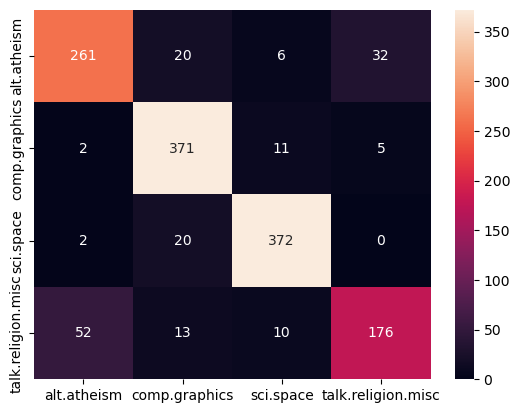

In [ ]:
#LogisticRegression()к необработанному тексту
lr = LogisticRegression()

#векторизация текста
newsgroups_train_tfidf, newsgroups_test_tfidf = vectorize(newsgroups_train.data, newsgroups_test.data)

#кросс-валидация, для более объективной оценки
cv_scores = cross_val_score(lr, newsgroups_train_tfidf, newsgroups_train.target, cv=5)

#обучение модели
lr.fit(newsgroups_train_tfidf, newsgroups_train.target)
lr_predictions = lr.predict(newsgroups_test_tfidf)


lr_confusion_matrix = confusion_matrix(newsgroups_test.target, lr_predictions)

print("Mean CV Score:", cv_scores.mean())
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names);

Mean CV Score: 0.9473923094612748


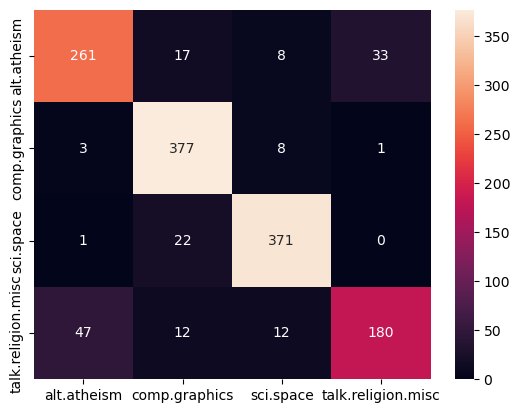

In [ ]:
#LogisticRegression()к обработанному тексту

lr_prep = LogisticRegression()
newsgroups_train_tfidf, newsgroups_test_tfidf = vectorize(newsgroups_train_preprocess, newsgroups_test_preprocess)

cv_scores = cross_val_score(lr_prep, newsgroups_train_tfidf, newsgroups_train.target, cv=5)

lr_prep.fit(newsgroups_train_tfidf, newsgroups_train.target)
lr_prep_predictions = lr_prep.predict(newsgroups_test_tfidf)
lr_prep_confusion_matrix = confusion_matrix(newsgroups_test.target, lr_prep_predictions)

print("Mean CV Score:", cv_scores.mean())
sns.heatmap(lr_prep_confusion_matrix, annot=True, fmt='d',xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names);

С обработанным текстом показатели после кросс-валидации улучшились, что и отображено на матрице ошибок. Лучше всего определяется comp.graphics и sci.space. Хуже всего talk.religion.misc

Mean CV Score: 0.8829958485130899


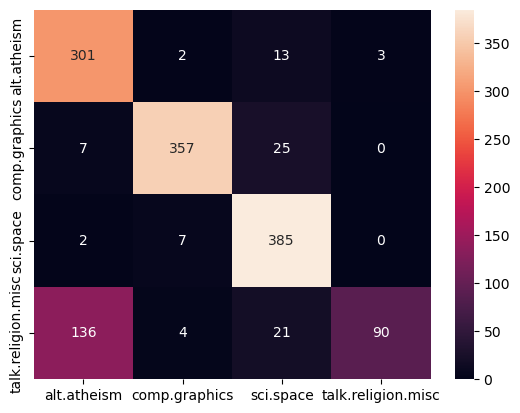

In [ ]:
#MultinomialNB()к необработанному тексту
nb = MultinomialNB()

newsgroups_train_tfidf, newsgroups_test_tfidf = vectorize(newsgroups_train.data, newsgroups_test.data)

cv_scores = cross_val_score(nb, newsgroups_train_tfidf, newsgroups_train.target, cv=5)


nb.fit(newsgroups_train_tfidf, newsgroups_train.target)
nb_predictions = nb.predict(newsgroups_test_tfidf)
nb_confusion_matrix = confusion_matrix(newsgroups_test.target, nb_predictions)

print("Mean CV Score:", cv_scores.mean())
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d',xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names);

Mean CV Score: 0.9208470001573451


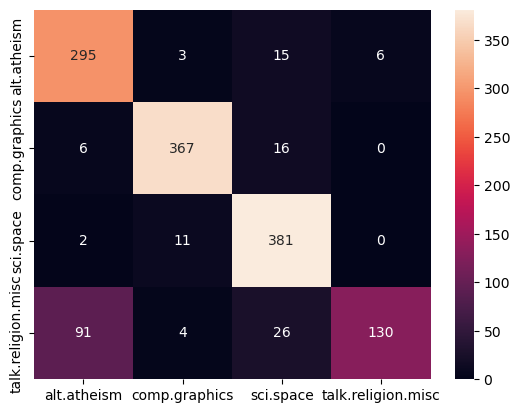

In [ ]:
#MultinomialNB()к обработанному тексту

nb_prep = MultinomialNB()
newsgroups_train_tfidf, newsgroups_test_tfidf = vectorize(newsgroups_train_preprocess, newsgroups_test_preprocess)

cv_scores = cross_val_score(nb_prep, newsgroups_train_tfidf, newsgroups_train.target, cv=5)


nb_prep.fit(newsgroups_train_tfidf, newsgroups_train.target)
nb_prep_predictions = nb_prep.predict(newsgroups_test_tfidf)
nb_prep_confusion_matrix = confusion_matrix(newsgroups_test.target, nb_prep_predictions)

print("Mean CV Score:", cv_scores.mean())
sns.heatmap(nb_prep_confusion_matrix, annot=True, fmt='d',xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names);

В данной модели новость talk.religion.misk часто путается с alt.atheism и определяется хуже всего

Mean CV Score: 0.8780697401387056


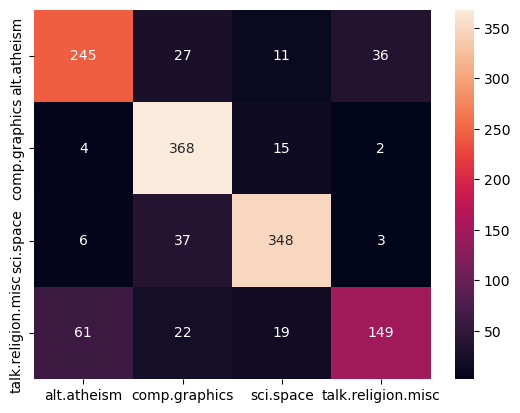

In [ ]:
#RandomForestClassifier()к необработанному тексту

rf = RandomForestClassifier()

newsgroups_train_tfidf, newsgroups_test_tfidf = vectorize(newsgroups_train.data, newsgroups_test.data)

cv_scores = cross_val_score(rf, newsgroups_train_tfidf, newsgroups_train.target, cv=5)


rf.fit(newsgroups_train_tfidf, newsgroups_train.target)
rf_predictions = rf.predict(newsgroups_test_tfidf)
rf_confusion_matrix = confusion_matrix(newsgroups_test.target, rf_predictions)

print("Mean CV Score:", cv_scores.mean())
sns.heatmap(rf_confusion_matrix, annot=True, fmt='d',xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names);

Mean CV Score: 0.9006741627431284


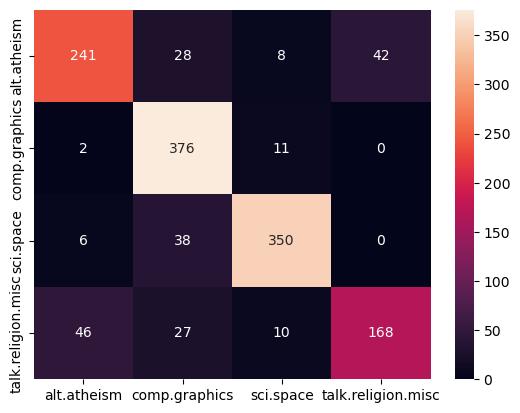

In [ ]:
#RandomForestClassifier()к обработанному тексту

rf_prep = RandomForestClassifier()
newsgroups_train_tfidf, newsgroups_test_tfidf = vectorize(newsgroups_train_preprocess, newsgroups_test_preprocess)

cv_scores = cross_val_score(rf_prep, newsgroups_train_tfidf, newsgroups_train.target, cv=5)


rf_prep.fit(newsgroups_train_tfidf, newsgroups_train.target)
rf_prep_predictions = rf_prep.predict(newsgroups_test_tfidf)
rf_prep_confusion_matrix = confusion_matrix(newsgroups_test.target, rf_prep_predictions)

print("Mean CV Score:", cv_scores.mean())
sns.heatmap(rf_prep_confusion_matrix, annot=True, fmt='d',xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names);

Наилучший результат показала модель LogisticRegression для обработанного текста.